### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

### Backgroud Information

**In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.**

(1) What is the independent variable? What is the dependent variable?

In [1]:
# Import packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read files
df=pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


**Here the independent variable is the word list and the dependent variable is the time that takes to read the color of the word list.**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**We want to see how the mean of the time differences for the two samples are different. I believe it is easier to read the congruent words so it will take less time to read, compared to the incongruent word.**

**So my null hypothesis(𝐻0) is that the mean(𝜇) of the time differences (𝐼𝑛𝑐𝑜𝑛𝑡𝑖𝑚𝑒−𝐶𝑜𝑛𝑡𝑖𝑚𝑒) between incongruent and congruent list is equal to zero. And my alternative hypothesis(𝐻1) is that the mean(𝜇) of the time differences between incongruent and congruent list(𝐼𝑛𝑐𝑜𝑛𝑡𝑖𝑚𝑒−𝐶𝑜𝑛𝑡𝑖𝑚𝑒) is greater than zero. that is, it takes less time to read the congruent word list.I am using an upper-tailed alternative hypothesis instead of two-tail to increase the power of the test.**

**Also I used mean of differences as this is a paired sample data.  We will test our hypothesis using  both bootstrap method and paired t-test.** 

**To do a bootstrap, we would have to random sample (with replacement) on the pairs of the original data. That is equivalent to do the bootstrap on the difference of the times per pair of observations.**

**We also tested the sample data using a paired t-test.**

$$H_0: \mu_{Incon_{time}-Con_{time}} =0$$
$$H_1: \mu_{Incon_{time}-Con_{time}}>0$$

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [54]:
# Perform the analysis here
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [77]:
# median of each of the samples
np.median(df['Congruent']),np.median(df['Incongruent'])

(14.3565, 21.0175)

In [74]:
# variance of each of the samples
np.var(df['Congruent']), np.var(df['Incongruent'])

(12.141152859375, 22.05293382638889)

**From the above results we see that the each of the samples consist of 24 people. Since it is less than 30, it is a small sample. The mean time for the sample to read Congruent words is 14.05 seconds compared to 22.02 seconds, the mean time for Incongruent words. The Congruent word sample has a standard deviation of 3.56 seconds, whereas the Incongruent word sample has a standard deviation of 4.8 seconds. So the Incongruent sample has a higher variance.**

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

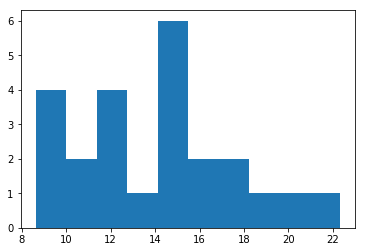

In [14]:
# Build the visualizations here
plt.hist(df['Congruent']);

**This is a distribution of sample data for Congruent words. Due to a small size we have this kind of distribution.The middle tall bar is time that has a higher frequncy or more individual's duration and our mean matches that time too. We can see as the time increases the number of individuals decreases, suggesting that most people take ~15.5 seconds or less to read the word list.This also matches with out descriptive statistics where we see that 75% of the sample can read the word list in 16.2 seconds or less.**

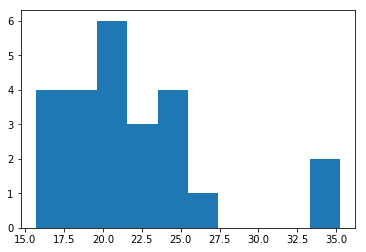

In [15]:
plt.hist(df['Incongruent']);

**This is a distribution of sample data for Incongruent words. We can see that we have soe few readings at the end, that has contributed to increasing the mean value of the sample. We can see here also as the time increases the number of individuals decreases, suggesting that most people take ~25.2 seconds or less to read the word list.This also matches with out descriptive statistics where we see that 75% of the sample can read the word list in 24.1 seconds or less.**

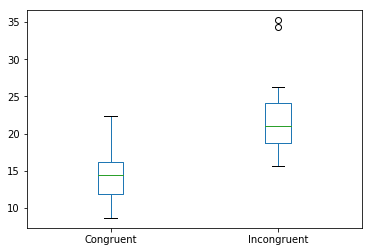

In [117]:
df.plot(kind='box');

A box plot is basically representing the same as in the histograms.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### Perform the statistical test using bootstrapping mthod

In [105]:
# create an array of differences and then take mean of the differences.
difference=df['Incongruent']-df['Congruent']
difference_mean=difference.mean()
difference_mean

7.964791666666667

In [106]:
# sampling distribution of the mean of differences between each observation pair.
# the test is repeated 10000 times to get a normal distribution for inference.
diff=[]
for _ in range(10000):
    diff.append(np.random.choice(difference, size=24, replace=True).mean())

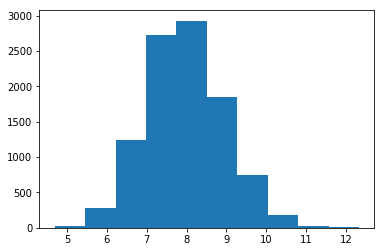

In [107]:
# Convert to numpy array
diff = np.array(diff)

# Plot sampling distribution 
plt.hist(diff);

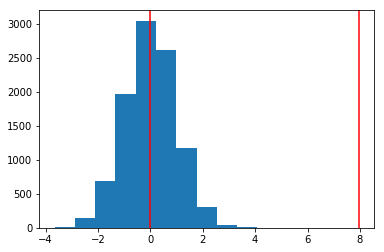

In [108]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diff), diff.size)

# Plot the null distribution
plt.hist(null_vals)
plt.axvline(0, color='red')
plt.axvline(difference_mean, color='red');

In [110]:
p=(null_vals>difference_mean).mean()
p

0.0

**The p-value gives the probability of observing the test results under the null hypothesis.The Type I error we decided on is 0.05, also known as alpha. From bootstrapping method we see that the p value is 0.0 which is less than the alpha=0.05. So we reject the null hypothesis in favor of the alternative. So the mean of the differences between the two samples is greater than 0. Or it takes less time to read the congruent word list. From the above histogram, we can also see that the difference of the means of the samples is further away from the distribution, indicating that the difference is not part of the null hypothesis distribution.**

**This also matches with our expectation that the duration of reading congruent word list is shorter than reading incongruent word list**

### Using t-test

**We use upper-tail paired t-test as:**

**1) it is a small sample size of 24 observations**

**2) we do not know the population mean or standard deviation**

**3) the two samples are dependent, as we record time of each individual to read the two types of list. Thus, the observations are paired.**

In [3]:
# calculate the t-statistic and p-value
t, p = stats.ttest_rel(df['Incongruent'], df['Congruent'])
# we divide p by 2 to make it a one-tail test
t, p/2

(8.020706944109957, 2.051500292855589e-08)

In [8]:
# calculate the t_critical using the degree of freedom and alpha
stats.t.ppf(1-0.05, 23)

1.7138715277470473

**We see here also that the p-value is less than alpha=0.05 and t>0, so the difference between the two means is statistically significant and we reject the null hypothesis in favor of the alternative.**

**This is further proved from the t-statistic and t-critical values.**

In [73]:
# calculate the degree of freedom of the data
degree_freedom= df['Congruent'].shape[0] - 1
degree_freedom

23

**For a degree of freedom of 23 and alpha=0.05 the t_critical value for a one-tailed test is 1.7139. As obtained from the following table:**

https://www.easycalculation.com/statistics/t-distribution-critical-value-table.php

**Since t>t_critical we reject the null hypothesis in favor of the alternative.**

**So we can conclude from our sample data that the time it takes to read congruent word list is less than the time it takes to read the incongruent word list.**

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**One of the effects observed is interference. We are so much fluent in reading that we can automatically read words when we see. Instead of reading the word that we see, if we have to name the color of the word, then our automatic reading of the word interferes with naming the color of the word. As such we take more time for incongruent words.**

**A similar task would be to have line drawings of objects with words superimposed on it. If the distractor word is different than the image, then it takes longer time to name the image**

References:
https://keydifferences.com/difference-between-t-test-and-z-test.html
http://pytolearn.csd.auth.gr/d1-hyptest/12/ttest-paired.html
https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/
https://stats.stackexchange.com/questions/183834/effect-size-and-bootstrapping-in-paired-t-test
https://www2.stat.duke.edu/courses/Spring13/sta101.001/slides/unit4lec1H.pdf
https://stackoverflow.com/questions/22611446/perform-2-sample-t-test
https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy
https://www.easycalculation.com/statistics/t-distribution-critical-value-table.php
https://www.scientificamerican.com/article/seeing-science-exploring-color-perception-with-the-stroop-effect/
https://link.springer.com/article/10.1007/BF00419659

In [118]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Test a Perceptual Phenomenon.ipynb'])

0